In [1]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import warnings
import cv2
warnings.filterwarnings('ignore')

In [2]:
#find the path to the “haarcascade_frontalface_alt2.xml” file.
cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"

In [3]:
#The next step is to load our classifier. The path to the above XML file goes as an argument to CascadeClassifier() method of OpenCV.
faceCascade = cv2.CascadeClassifier(cascPath)

In [4]:
#open the webcam using this simple OpenCV
video_capture = cv2.VideoCapture(0);
while(True):
    ret,frame = video_capture.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

In [5]:
#convert the frame into greyscale.
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [6]:
#The term MultiScale indicates that the algorithm looks at subregions of the image in multiple scales, to detect faces of varying sizes.
faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)

In [7]:
#The coordinates indicate the row and column of pixels in the image. 
for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)

In [8]:
#display image from our dataset
from imutils import paths
from tensorflow.keras.preprocessing.image import load_img
imagePaths = list(paths.list_images('C:\\Users\\Shreya Thakur\\anaconda3\\data'))
data = []
labels = []
import cv2
for imagePath in imagePaths:
    image = load_img(imagePath) 

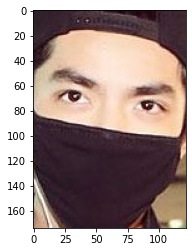

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [10]:
# we preprocess the image and resize it to 224x 224 dimensions.
from imutils import paths
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
imagePaths = list(paths.list_images('C:\\Users\\Shreya Thakur\\anaconda3\\data'))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype='float32')
labels = np.array(labels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


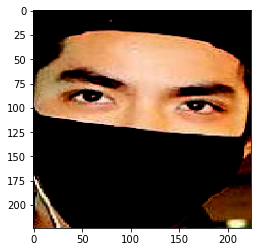

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [12]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [13]:
image

array([[[-0.6156863 , -0.73333335, -0.6784314 ],
        [-0.6156863 , -0.73333335, -0.6784314 ],
        [-0.6156863 , -0.73333335, -0.6784314 ],
        ...,
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       [[-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.64705884, -0.7647059 , -0.70980394],
        ...,
        [-0.4980392 , -0.67058825, -0.64705884],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       [[-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.64705884, -0.7647059 , -0.70980394],
        ...,
        [-0.4980392 , -0.67058825, -0.64705884],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       ...,

       [[ 0.4901961 ,  0.19215691,  0.01176476],
        [ 0

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#load the pre-trained model and customize it according to our problem
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_shape=(224, 224, 3))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




#convert the labels into one-hot encoding.
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [16]:
# compile the model and train it on the augmented data.
INIT_LR = 1e-4
EPOCHS = 2
BS = 50
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Epoch 1/2
120/120 [==============================] - 360s 3s/step - loss: 0.2684 - accuracy: 0.9092 - val_loss: 0.0932 - val_accuracy: 0.9735
Epoch 2/2
120/120 [==============================] - 308s 3s/step - loss: 0.0986 - accuracy: 0.9703 - val_loss: 0.0650 - val_accuracy: 0.9815


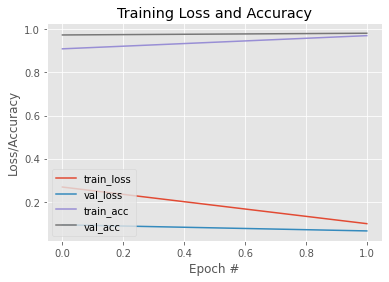

In [17]:
#graph to see its learning curve. 
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [18]:
#To save the trained model
model.save('mask_recog_ver2.h5')

In [19]:
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
 
cascPath = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
model = load_model("mask_recog_ver2.h5")
 
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    faces_list=[]
    preds=[]
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h,x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        face_frame =  preprocess_input(face_frame)
        faces_list.append(face_frame)
        if len(faces_list)>0:
            preds = model.predict(faces_list)
        for pred in preds:
            (mask, withoutMask) = pred
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y- 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
 
        cv2.rectangle(frame, (x, y), (x + w, y + h),color, 2)
        # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

ValueError: in user code:

    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Shreya Thakur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer model expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 224, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 224, 224, 3) dtype=float32>]
